In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("hpf1.jpg")

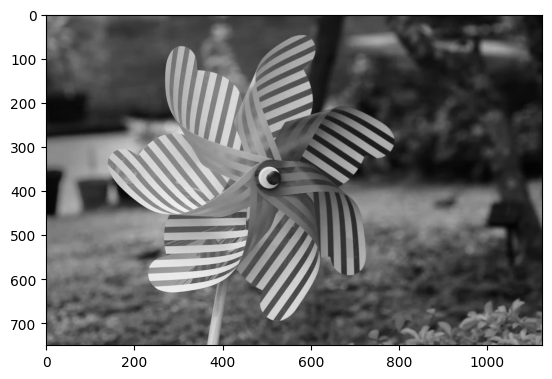

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

1. LAPLACIAN

In [ ]:
lap_matrix = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
lap_matrix = np.array(lap_matrix)
result = np.zeros(img.shape)

In [ ]:
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      result[i,j] = img[i-1,j-1]*lap_matrix[0,0] + img[i-1,j]*lap_matrix[0,1] + img[i-1,j+1]*lap_matrix[0,2] + img[i,j-1]*lap_matrix[1,0] + img[i,j]*lap_matrix[1,1] + img[i,j+1]*lap_matrix[1,2] + img[i+1,j-1]*lap_matrix[2,0] + img[i+1,j]*lap_matrix[2,1] + img[i+1,j+1]*lap_matrix[2,2]

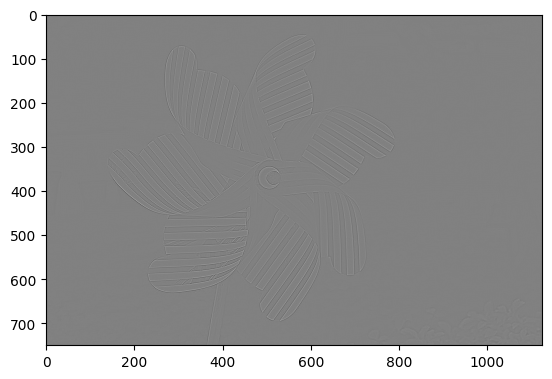

In [ ]:
plt.imshow(result, cmap="gray")

2. GAUSSIAN -> LAPLACIAN -> 5x5 mask

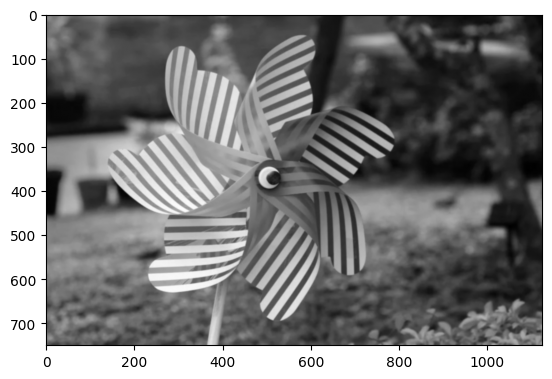

In [ ]:
ksize = (0, 0)
sigma = 1.0

g = cv2.GaussianBlur(img, ksize, sigma)
plt.imshow(g, cmap="gray")

In [ ]:
lap_result = np.zeros(img.shape)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      lap_result[i,j] = g[i-1,j-1]*lap_matrix[0,0] + g[i-1,j]*lap_matrix[0,1] + g[i-1,j+1]*lap_matrix[0,2] + g[i,j-1]*lap_matrix[1,0] + g[i,j]*lap_matrix[1,1] + g[i,j+1]*lap_matrix[1,2] + g[i+1,j-1]*lap_matrix[2,0] + g[i+1,j]*lap_matrix[2,1] + g[i+1,j+1]*lap_matrix[2,2]

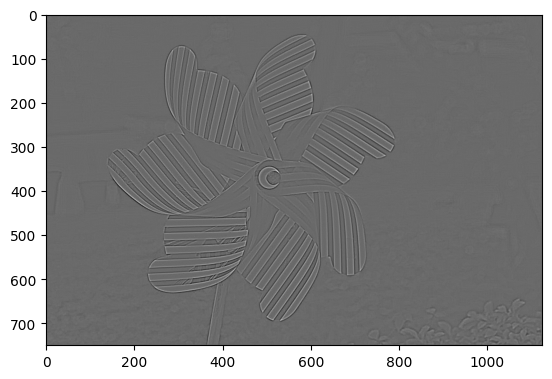

In [ ]:
plt.imshow(lap_result, cmap="gray")

In [ ]:
matrix = [[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]
matrix = np.array(matrix)

In [ ]:
final_img = np.zeros(img.shape)
for i in range(2, img.shape[0]-2):
    for j in range(2, img.shape[1]-2):
      final_img[i,j] = img[i-2,j-2]*matrix[0,0] + img[i-2,j-1]*matrix[0,1] + img[i-2,j]*matrix[0,2] + img[i-2,j+1]*matrix[0, 3] + img[i-2,j+2]*matrix[0,4] +\
      img[i-1,j-2]*matrix[1, 0] + img[i-1,j-1]*matrix[1,1] + img[i-1,j]*matrix[1,2] + img[i-1,j+1]*matrix[1,3] + img[i-1,j+2]*matrix[1,4] +\
      img[i,j-2]*matrix[2,0] + img[i,j-1]*matrix[2,1] + img[i,j]*matrix[2,2] + img[i,j+1]*matrix[2,3] + img[i,j+2]*matrix[2,4] +\
      img[i+1,j-2]*matrix[3,0] + img[i+1,j-1]*matrix[3,1] + img[i+1,j]*matrix[3,2] + img[i+1,j+1]*matrix[3,3] + img[i+1,j+2]*matrix[3,4] +\
      img[i+2,j-2]*matrix[4,0] + img[i+2,j-1]*matrix[4,1] + img[i+2,j]*matrix[4,2] + img[i+2,j+1]*matrix[4,3] + img[i+2,j+2]*matrix[4,4]

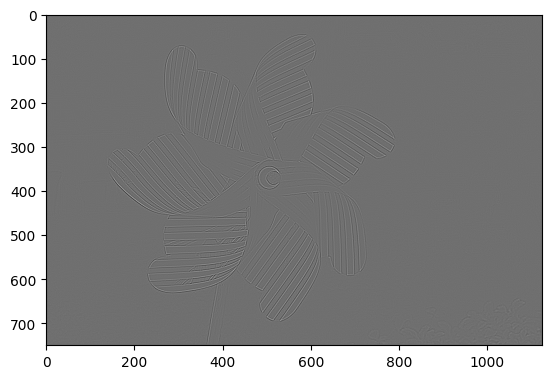

In [ ]:
plt.imshow(final_img, cmap="gray")

3. CANNY EDGE DETECTOR

In [ ]:
canny = cv2.Canny(img, 50, 150, edges=None, apertureSize=3, L2gradient=False)

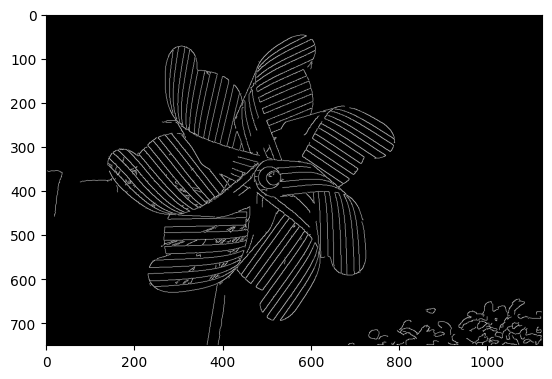

In [ ]:
plt.imshow(canny, cmap='gray')

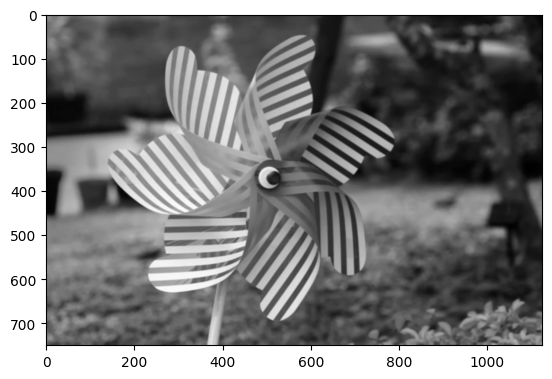

In [ ]:
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(blurred_img, cmap='gray')

In [ ]:
grad_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x) * (180 / np.pi)

In [ ]:
rows, cols = magnitude.shape
nms = np.zeros((rows, cols), dtype=np.uint8)

angle = direction
angle[angle < 0] += 180

for i in range(1, rows-1):
    for j in range(1, cols-1):
        q = 255
        r = 255


        if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
            q = magnitude[i, j+1]
            r = magnitude[i, j-1]
        elif (22.5 <= angle[i, j] < 67.5):
            q = magnitude[i+1, j-1]
            r = magnitude[i-1, j+1]
        elif (67.5 <= angle[i, j] < 112.5):
            q = magnitude[i+1, j]
            r = magnitude[i-1, j]
        elif (112.5 <= angle[i, j] < 157.5):
            q = magnitude[i-1, j-1]
            r = magnitude[i+1, j+1]

        if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
            nms[i, j] = magnitude[i, j]
        else:
            nms[i, j] = 0


lowThreshold = 50
highThreshold = 100

strong = 255
weak = 75

res = np.zeros_like(nms, dtype=np.uint8)
strong_i, strong_j = np.where(nms >= highThreshold)
weak_i, weak_j = np.where((nms <= highThreshold) & (nms >= lowThreshold))

res[strong_i, strong_j] = strong
res[weak_i, weak_j] = weak


for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        if res[i, j] == weak:
            if ((res[i+1, j-1] == strong) or (res[i+1, j] == strong) or (res[i+1, j+1] == strong)
                or (res[i, j-1] == strong) or (res[i, j+1] == strong)
                or (res[i-1, j-1] == strong) or (res[i-1, j] == strong) or (res[i-1, j+1] == strong)):
                res[i, j] = strong
            else:
                res[i, j] = 0


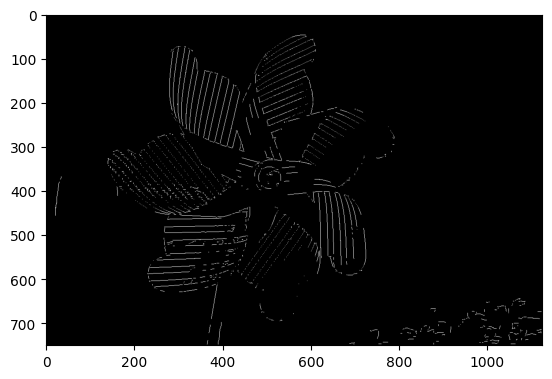

In [ ]:
plt.imshow(res, cmap='gray')